分析结果：
```
    测试和优化方案：
    测试周期：  2013.1~2023.1（10年）
    测试窗口    2年、3年、5年
    滚动窗口    3个月滚动一次，每年4个滚动
    测试数量：  8x4+7x4+5x4= 32+28+20 = 80个测试（ 剩余年数 * 年移动4次）
```

In [5]:
import pandas as pd
df = pd.read_csv("../debug/510310,510500,159915,588090_20130101_20230101_2,3,5_3.csv")
df1 = df[["基金代码", "投资起始", "投资结束", "组合年化","组合收益","基准收益", "基金收益"]]
plus = df1[df['组合收益']>0]
minus = df1[df['组合收益']<0]
good = df1[df['组合收益']>df['基金收益']]
bad = df1[df['组合收益']<df['基金收益']]

print(f"一共测试了{len(df1)}个场景")
print(f"平均年化：{df['组合年化'].mean()}")
print(f"年化方差：{df['组合年化'].std()}")
print(f"最大年化：{df['组合年化'].max()}")
print(f"最小年化：{df['组合年化'].min()}")
print(f"负收益比例：{len(minus)/len(df1)}")
print(f"强于基金比例：{len(good)/len(df1)}")
print("比基金差的情况：")
print(bad)
print("年化为负的情况：")
print(minus)


一共测试了266个场景
平均年化：0.06537966427202732
年化方差：0.09505761545481416
最大年化：0.3733779481921013
最小年化：-0.1489728580229663
负收益比例：0.16917293233082706
强于基金比例：0.5451127819548872
比基金差的情况：
       基金代码      投资起始      投资结束      组合年化      组合收益      基准收益      基金收益
0    510310  20130104  20151231  0.098375  0.325108  0.554323  0.521400
1    510500  20130104  20151231  0.098375  0.325108  0.554323  1.201300
2    159915  20130104  20151231  0.098375  0.325108  0.554323  2.600346
3    510310  20140702  20160630  0.050218  0.102959  0.422541  0.490358
4    510500  20140702  20160630  0.050218  0.102959  0.422541  0.606750
..      ...       ...       ...       ...       ...       ...       ...
249  510310  20160704  20190630 -0.037673 -0.108814 -0.003254  0.271102
255  510310  20140402  20190329  0.008954  0.045577  0.501105  0.936814
256  510500  20140402  20190329  0.008954  0.045577  0.501105  0.526654
257  159915  20140402  20190329  0.008954  0.045577  0.501105  0.251028
262  510310  20161010  20210930  0.0

(array([ 3.,  0.,  3.,  6.,  0.,  6., 12.,  3., 30., 42., 29., 18., 12.,
        20., 22., 10.,  4.,  7.,  4.,  4.,  8.,  4., 11.,  0.,  0.,  0.,
         0.,  4.,  0.,  4.]),
 array([-0.14897286, -0.13156116, -0.11414947, -0.09673778, -0.07932608,
        -0.06191439, -0.0445027 , -0.027091  , -0.00967931,  0.00773238,
         0.02514408,  0.04255577,  0.05996746,  0.07737916,  0.09479085,
         0.11220255,  0.12961424,  0.14702593,  0.16443763,  0.18184932,
         0.19926101,  0.21667271,  0.2340844 ,  0.25149609,  0.26890779,
         0.28631948,  0.30373117,  0.32114287,  0.33855456,  0.35596625,
         0.37337795]),
 <a list of 30 Patch objects>)

/data/software/py3/lib/python3.10/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/data/software/py3/lib/python3.10/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


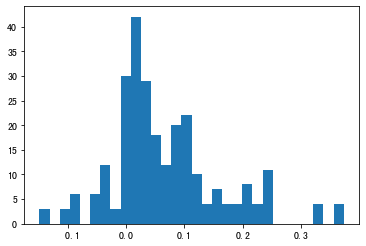

In [6]:
import matplotlib.pyplot as plt
plt.hist(df1['组合年化'],bins=30)